# Assign_6_ Whether the client has subscribed a term deposit or not

In [23]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#importing dataset
data= pd.read_csv("/content/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.shape

(45211, 17)

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

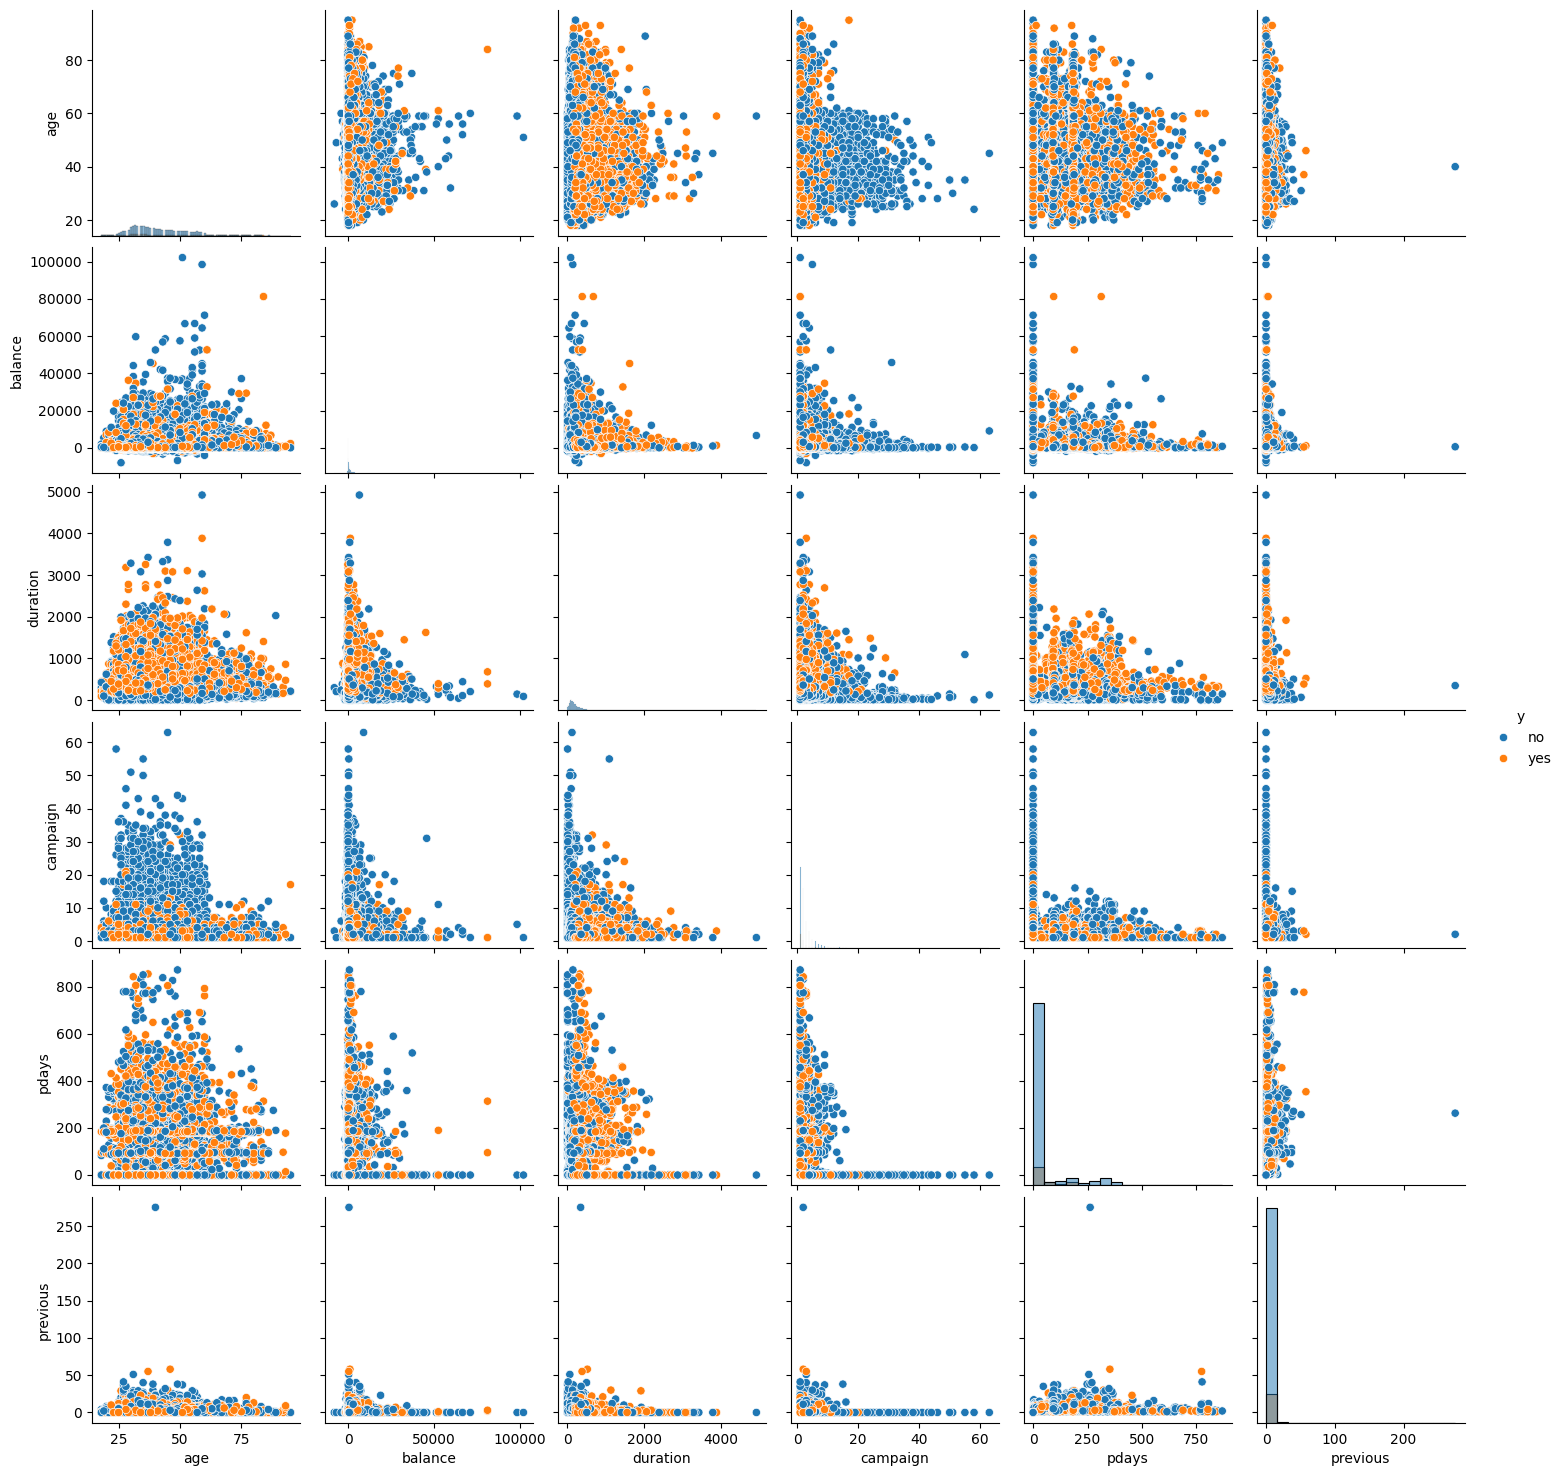

In [11]:
#EDA,Visualizing the distribution of numerical features
sns.pairplot(data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue='y', diag_kind='hist')
plt.show()

<ipython-input-14-460986e2ac4b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


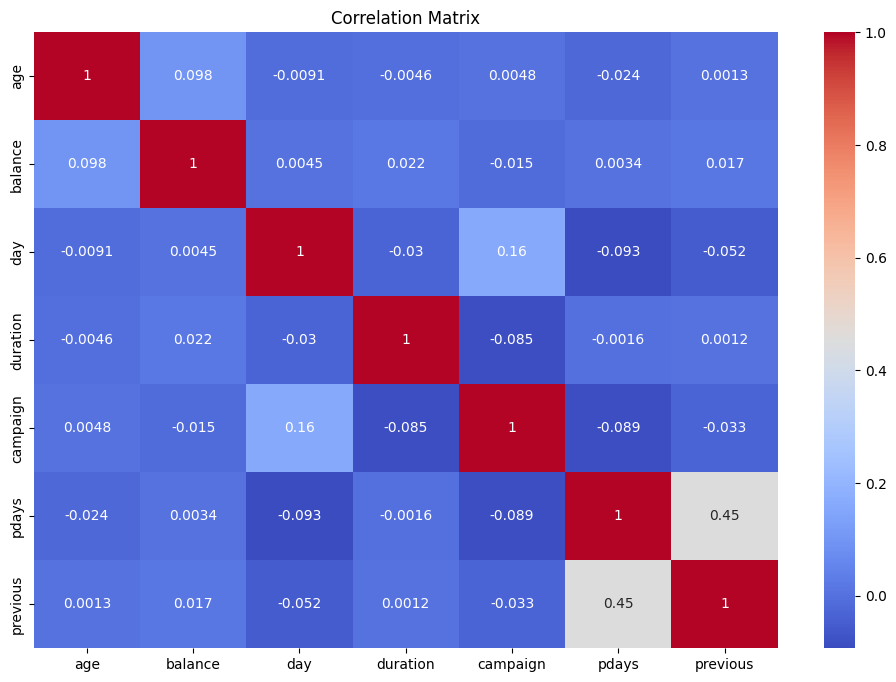

In [14]:
#Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
#seprating varibale and target values
x = data.iloc[:,:-1]
y= data.iloc[:,-1]

In [16]:
#Converting categorical variables to dummy/indicator variables
x = pd.get_dummies(x, drop_first=True)

In [17]:
#splitting dataset into traininga and testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
#Initializing the Logistic Regression model
model = LogisticRegression()

#Training the model
model.fit(x_train, y_train)

#Making predictions on the test set
y_pred = model.predict(x_test)

In [20]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Display results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.90
Confusion Matrix:
[[7755  197]
 [ 719  372]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



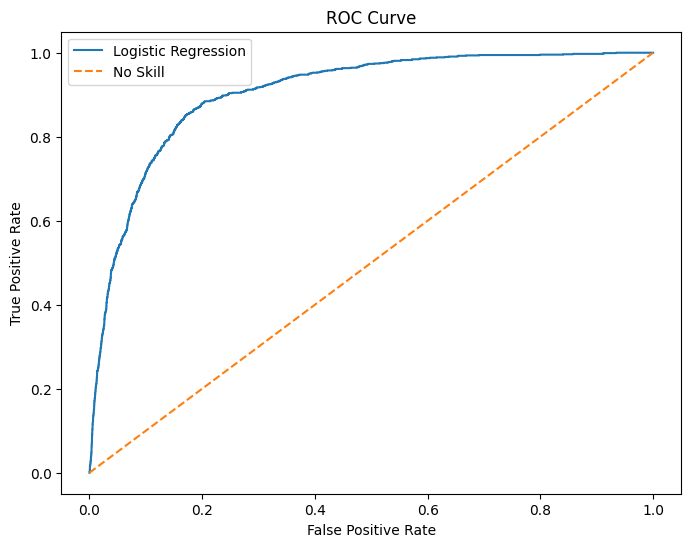

In [26]:
#Converting 'yes' and 'no' to binary values
y_test_binary = y_test.apply(lambda x: 1 if x == 'yes' else 0)

#ROC curve plot
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
#Calculating and displaying the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.90


Insights
The model did a good job overall, with 90% accuracy in predicting whether clients would subscribe to a term deposit. It was particularly good at identifying clients who wouldn't subscribe [92% precision], but not as good at identifying those who would [65% precision].

For clients who didn't subscribe, the model correctly identified 98% of them [high recall], but for clients who did subscribe, it only caught 34% [low recall].

